In [57]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn.cluster import KMeans
import seaborn as sns

In [58]:
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

#reading the data
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<Axes: ylabel='Density'>

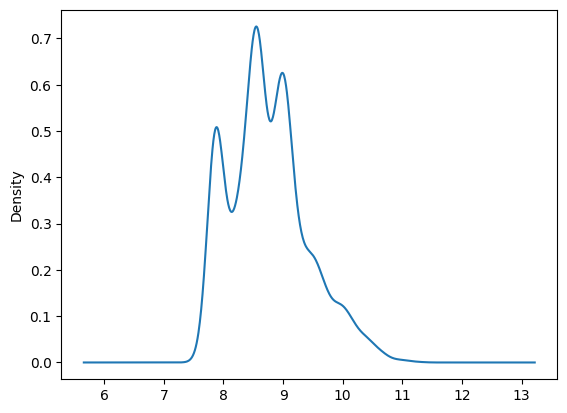

In [59]:
df['Customer Lifetime Value'] = np.log(df['Customer Lifetime Value'])

df['Customer Lifetime Value'].plot(kind='kde')

In [60]:
df_min = 7.54856002289194
df['Customer Lifetime Value'].min()

7.54856002289194

In [61]:
df_max = 11.33050847790295
df['Customer Lifetime Value'].max()

11.33050847790295

In [62]:
# Searching for NaN values
dropnans = df.dropna()
dropnans

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,7.924260,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,8.850738,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,9.464008,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,8.941920,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,7.942253,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,10.060747,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,8.038031,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,9.007476,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,8.925912,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [63]:
df['Response'] = pd.to_numeric(df['Response'].map({'No':1,'Yes':2}))
df['Coverage'] = pd.to_numeric(df['Coverage'].map({'Basic':1,'Extended':2,'Premium':3}))
df['Education'] = pd.to_numeric(df['Education'].map({'High School or Below':1,'College':2,'Bachelor':3,'Master':4,'Doctor':5}))
df['Vehicle Size'] = pd.to_numeric(df['Vehicle Size'].map({'Small':1,'Medsize':2,'Large':3}))


label_encoder = LabelEncoder()
categorical_cols = ['Customer', 'State','Effective To Date', 'EmploymentStatus','Gender', 'Marital Status','Location Code',
                    'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class']


for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   int64  
 1   State                          9134 non-null   int64  
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   int64  
 4   Coverage                       9134 non-null   int64  
 5   Education                      9134 non-null   int64  
 6   Effective To Date              9134 non-null   int64  
 7   EmploymentStatus               9134 non-null   int64  
 8   Gender                         9134 non-null   int64  
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   int64  
 11  Marital Status                 9134 non-null   int64  
 12  Monthly Premium Auto           9134 non-null   i

In [65]:
df = df.drop(['Customer', 'Effective To Date'], axis=1)
df.corr()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
State,1.000000,0.001137,-0.002473,0.002047,-0.003758,0.000368,-0.004933,0.004620,-0.005240,0.020371,...,0.013965,-0.000021,-0.013866,0.008638,0.014241,-0.007194,-0.003080,0.005495,0.011407,-0.006846
Customer Lifetime Value,0.001137,1.000000,-0.006262,0.223766,-0.021906,-0.051220,-0.011069,0.041950,0.003584,-0.033657,...,0.001310,-0.045371,0.195676,0.018360,0.012477,-0.097619,-0.014360,0.245374,0.103878,-0.019865
Response,-0.002473,-0.006262,1.000000,0.000642,0.022809,-0.016703,0.004396,0.011932,0.001729,-0.094843,...,0.002952,-0.009881,-0.020891,0.001110,-0.001461,-0.162882,-0.086607,0.016877,0.021225,0.050691
Coverage,0.002047,0.223766,0.000642,1.000000,-0.018081,0.003239,-0.014448,-0.010646,-0.020176,0.002956,...,0.010658,-0.007971,-0.013515,0.001469,-0.002317,-0.049092,-0.024638,0.279078,-0.017682,0.003775
Education,-0.003758,-0.021906,0.022809,-0.018081,1.000000,-0.098309,-0.010496,0.067275,-0.018900,-0.096416,...,0.010968,0.008076,-0.005594,0.008416,0.003448,-0.014949,0.006305,-0.132145,0.000610,0.001489
EmploymentStatus,0.000368,-0.051220,-0.016703,0.003239,-0.098309,1.000000,0.034960,-0.726741,0.015921,0.311563,...,0.015376,0.007045,0.005035,-0.002240,-0.001159,-0.121378,-0.018346,0.330465,-0.002443,0.011253
Gender,-0.004933,-0.011069,0.004396,-0.014448,-0.010496,0.034960,1.000000,-0.015138,0.003108,0.034027,...,0.004198,-0.003012,0.016258,-0.002227,-0.003123,0.045276,-0.020614,0.074564,0.020043,0.000347
Income,0.004620,0.041950,0.011932,-0.010646,0.067275,-0.726741,-0.015138,1.000000,-0.027517,-0.231673,...,-0.000875,0.006408,-0.008656,0.002080,0.005032,0.139856,0.013494,-0.355254,0.004343,-0.007945
Location Code,-0.005240,0.003584,0.001729,-0.020176,-0.018900,0.015921,0.003108,-0.027517,1.000000,0.016452,...,0.007030,-0.002697,0.003066,0.015096,0.012086,-0.023625,-0.003953,0.254766,0.001870,-0.021230
Marital Status,0.020371,-0.033657,-0.094843,0.002956,-0.096416,0.311563,0.034027,-0.231673,0.016452,1.000000,...,-0.029345,-0.000011,0.011664,0.013052,0.008139,-0.025818,-0.017967,0.204675,0.017597,-0.017493


In [66]:
# K-means clustering
# takes df, names of the variables, new variable name, number of clusters
# and whether you want a graph
# Returns dataframe with new cluster variables
def clusterize(df, names, cluster_name,n_clusters,graph=False):

  new_df = df.copy()

  print(names)
  print(n_clusters)

  # Scaling variables
  X_scaled = new_df.loc[:, names]
  X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

  # creating clusters
  kmeans = KMeans(n_clusters = n_clusters,max_iter=1000)
  new_df[cluster_name] = kmeans.fit_predict(X_scaled)
  new_df[cluster_name] = label_encoder.fit_transform(new_df[cluster_name])

  # graphs
  if graph == True:
    sns.relplot(
      x="value", y="Customer Lifetime Value", hue=cluster_name, col="variable",
      height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
      data=new_df.melt(
          value_vars=names, id_vars=["Customer Lifetime Value", cluster_name],
      ),
    )

  # Dropping original vars
  new_df = new_df.drop(names, axis=1)

  return new_df

In [67]:
def num_of_clusters(limit,df, names, cluster_name,n_clusters,graph=False):
  for i in range(2,limit):
    clusterize(df, names, cluster_name,i,True)


In [68]:
# Code used to explore different clusters (of size two)
'''
seen = df.drop(['Customer Lifetime Value'],axis=1).columns
cluster_cor = {}

for i in range(0,len(seen)):
  for j in range(i+1,len(seen)):
    if i != j:
      temp_df = clusterize(df,[seen[i],seen[j]],'Var',25,graph=False)
      combo = seen[i] + '/' + seen[j]
      cluster_cor[combo] = temp_df['Customer Lifetime Value'].corr(temp_df['Var'])

print(cluster_cor)
for keys,values in cluster_cor.items():
  if values > 0.1:
    print(values, " ",keys)
'''

'\nseen = df.drop([\'Customer Lifetime Value\'],axis=1).columns\ncluster_cor = {}\n\nfor i in range(0,len(seen)):\n  for j in range(i+1,len(seen)):\n    if i != j:\n      temp_df = clusterize(df,[seen[i],seen[j]],\'Var\',25,graph=False)\n      combo = seen[i] + \'/\' + seen[j]\n      cluster_cor[combo] = temp_df[\'Customer Lifetime Value\'].corr(temp_df[\'Var\'])\n\nprint(cluster_cor)\nfor keys,values in cluster_cor.items():\n  if values > 0.1:\n    print(values, " ",keys)\n'

In [69]:
'''
for keys,values in cluster_cor.items():
  if values > 0.1:
    words = keys.split('/')
    clusterize(df,[words[0],words[1]],'Var',25,graph=True)
'''

"\nfor keys,values in cluster_cor.items():\n  if values > 0.1:\n    words = keys.split('/')\n    clusterize(df,[words[0],words[1]],'Var',25,graph=True)\n"

['Vehicle Class', 'Vehicle Size']
16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['Total Claim Amount', 'Months Since Last Claim']
20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['State', 'Location Code']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (60). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


['Policy', 'Policy Type', 'Number of Policies']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


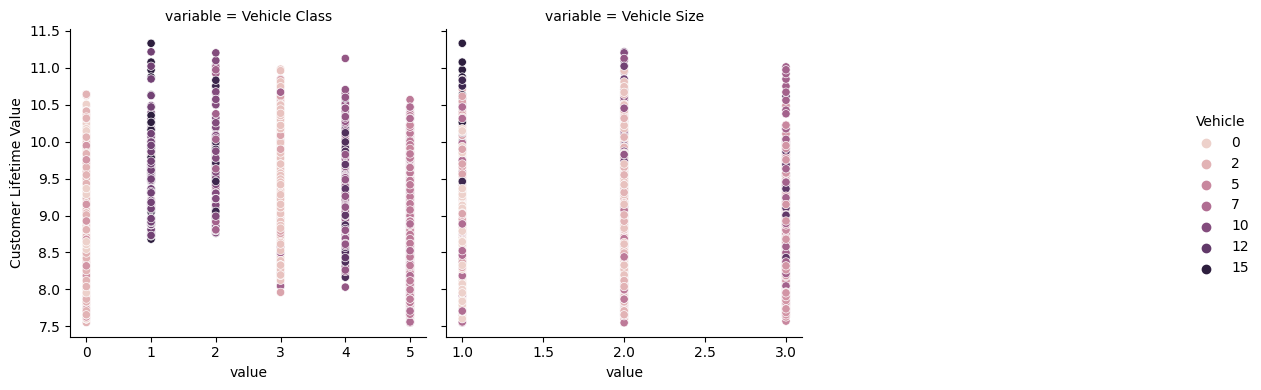

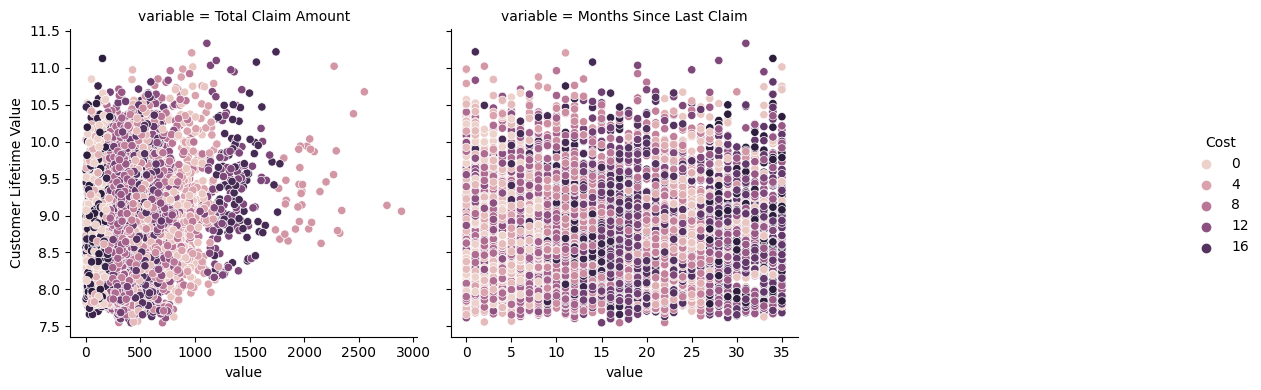

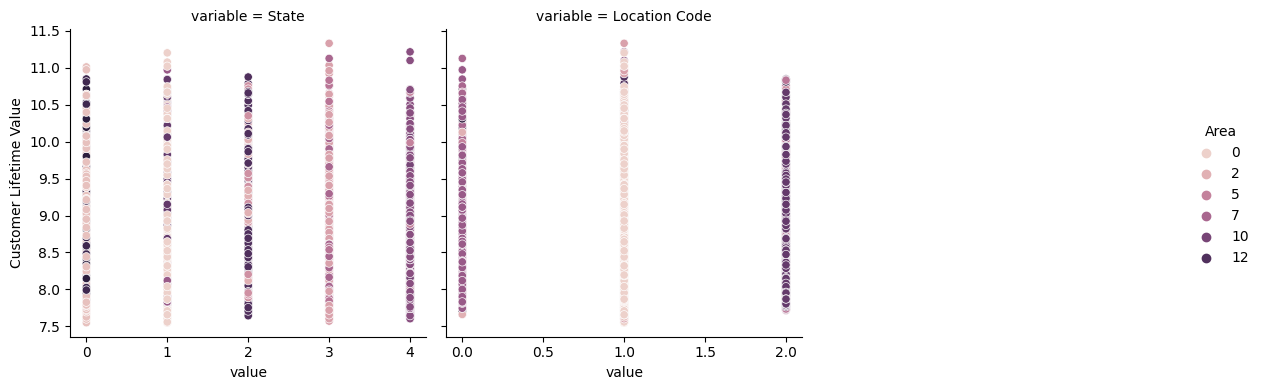

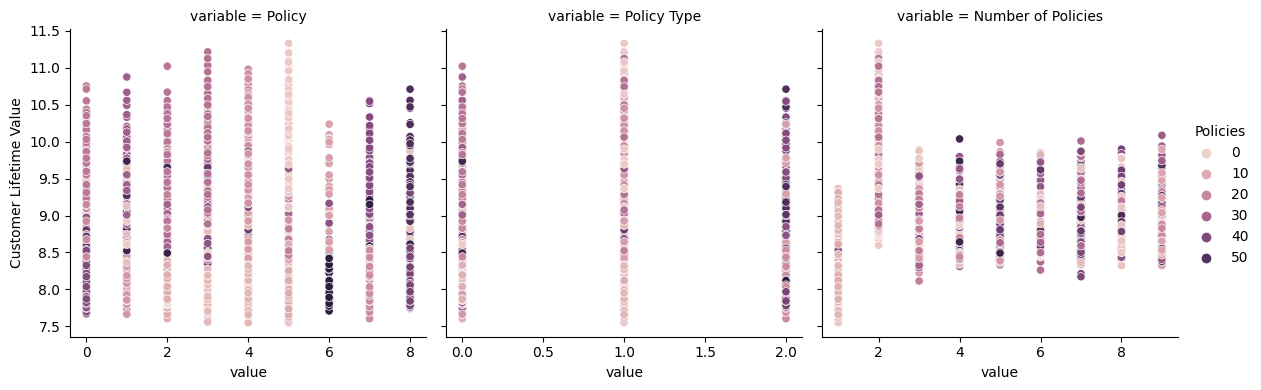

In [70]:
cluster_df = df.copy()

vehicle_df = clusterize(cluster_df,['Vehicle Class','Vehicle Size'],'Vehicle',16,graph=True)

cost_df = clusterize(cluster_df,['Total Claim Amount','Months Since Last Claim'],'Cost',20,graph=True)

area_df = clusterize(cluster_df,['State','Location Code'],'Area',60,graph=True)

policies_df = clusterize(cluster_df,['Policy','Policy Type','Number of Policies'],'Policies',60,graph=True)

In [71]:
cluster_df.corr()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
State,1.000000,0.001137,-0.002473,0.002047,-0.003758,0.000368,-0.004933,0.004620,-0.005240,0.020371,...,0.013965,-0.000021,-0.013866,0.008638,0.014241,-0.007194,-0.003080,0.005495,0.011407,-0.006846
Customer Lifetime Value,0.001137,1.000000,-0.006262,0.223766,-0.021906,-0.051220,-0.011069,0.041950,0.003584,-0.033657,...,0.001310,-0.045371,0.195676,0.018360,0.012477,-0.097619,-0.014360,0.245374,0.103878,-0.019865
Response,-0.002473,-0.006262,1.000000,0.000642,0.022809,-0.016703,0.004396,0.011932,0.001729,-0.094843,...,0.002952,-0.009881,-0.020891,0.001110,-0.001461,-0.162882,-0.086607,0.016877,0.021225,0.050691
Coverage,0.002047,0.223766,0.000642,1.000000,-0.018081,0.003239,-0.014448,-0.010646,-0.020176,0.002956,...,0.010658,-0.007971,-0.013515,0.001469,-0.002317,-0.049092,-0.024638,0.279078,-0.017682,0.003775
Education,-0.003758,-0.021906,0.022809,-0.018081,1.000000,-0.098309,-0.010496,0.067275,-0.018900,-0.096416,...,0.010968,0.008076,-0.005594,0.008416,0.003448,-0.014949,0.006305,-0.132145,0.000610,0.001489
EmploymentStatus,0.000368,-0.051220,-0.016703,0.003239,-0.098309,1.000000,0.034960,-0.726741,0.015921,0.311563,...,0.015376,0.007045,0.005035,-0.002240,-0.001159,-0.121378,-0.018346,0.330465,-0.002443,0.011253
Gender,-0.004933,-0.011069,0.004396,-0.014448,-0.010496,0.034960,1.000000,-0.015138,0.003108,0.034027,...,0.004198,-0.003012,0.016258,-0.002227,-0.003123,0.045276,-0.020614,0.074564,0.020043,0.000347
Income,0.004620,0.041950,0.011932,-0.010646,0.067275,-0.726741,-0.015138,1.000000,-0.027517,-0.231673,...,-0.000875,0.006408,-0.008656,0.002080,0.005032,0.139856,0.013494,-0.355254,0.004343,-0.007945
Location Code,-0.005240,0.003584,0.001729,-0.020176,-0.018900,0.015921,0.003108,-0.027517,1.000000,0.016452,...,0.007030,-0.002697,0.003066,0.015096,0.012086,-0.023625,-0.003953,0.254766,0.001870,-0.021230
Marital Status,0.020371,-0.033657,-0.094843,0.002956,-0.096416,0.311563,0.034027,-0.231673,0.016452,1.000000,...,-0.029345,-0.000011,0.011664,0.013052,0.008139,-0.025818,-0.017967,0.204675,0.017597,-0.017493


In [72]:
print(df.columns)

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [73]:
def RMSE(y_true,y_pred):
  rmse = mean_squared_error(y_true,y_pred,squared=False)
  return rmse

def tr_score():
  return make_scorer(RMSE)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def formula_and_column(df):

  formula = "Customer_Lifetime_Value ~ "
  is_first = True

  for i in df.drop(['Customer_Lifetime_Value'], axis=1).columns:
    new_string = '_'.join(i.split())
    df = df.rename(columns={i:new_string})
    if is_first:
      formula = formula + new_string
      is_first = False
    else:
      formula = formula + "+" + new_string

  return df, formula

In [74]:
# models: Lasso, Elastic, GLM, Decision Tree, Random Forest, Boosted Tree
def model_tests(df, model_list):

  models = {}

  df = df.rename(columns={'Customer Lifetime Value': 'Customer_Lifetime_Value'})

  train, test = train_test_split(df, test_size=0.2)

  X = test.drop(['Customer_Lifetime_Value'], axis=1)
  y = test['Customer_Lifetime_Value']

  train_x = train.drop(['Customer_Lifetime_Value'], axis=1)
  train_y = train['Customer_Lifetime_Value']

  if "Lasso" in model_list:
    # Lasso
    clf = linear_model.Lasso(alpha=0.1)
    clf.fit(train_x, train_y)

    preds = clf.predict(X)

    print("Lasso Test Score: ", rmse(preds, y))

    models['Lasso'] = clf

  if "Elastic" in model_list:
    # Ridge with elastic net

    e_net = ElasticNet(alpha = 1)
    e_net.fit(train_x, train_y)

    preds = e_net.predict(X)

    print("Elastic Net Test Score: ", rmse(preds, y))

    models["Elastic Net"] = e_net

  if "GLM" in model_list:
    # GLM

    df, formula = formula_and_column(df)
    df = df.rename(columns={'Customer Lifetime Value': 'Customer_Lifetime_Value'})

    train, test = train_test_split(df, test_size=0.2)

    X = test.drop(['Customer_Lifetime_Value'], axis=1)
    y = test['Customer_Lifetime_Value']

    train_x = train.drop(['Customer_Lifetime_Value'], axis=1)
    train_y = train['Customer_Lifetime_Value']

    gamma_model = smf.glm(formula=formula,
                    data=train,
                    family=sm.families.InverseGaussian(link=sm.families.links.log())).fit()

    # now generate predictions
    ypred = gamma_model.predict(X)

    # calc rmse
    r = rmse(y, ypred)

    # now generate predictions
    ytrainpred = gamma_model.predict(train_x)

    # calc rmse
    r_train = rmse(train_y, ytrainpred)

    print("GLM Train and Test")
    display(r_train)
    display(r)

    print(gamma_model.summary())

    models['GLM'] = gamma_model

  if "Decision Tree" in model_list:
    # Decision Tree

    grid_vals = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13],
             'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,13,14]}
    model = DecisionTreeRegressor()

    grid_dt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=10,scoring=tr_score())

    grid_dt.fit(train_x, train_y)
    preds = grid_dt.best_estimator_.predict(X)

    print("DT Training Score: ", grid_dt.best_score_)
    print("DT Test Score: ", rmse(preds, y))
    print("DT best params: ", grid_dt.best_params_)

    models['Decision Tree'] = grid_dt

  if "Random Forest" in model_list:
    # Random Forest

    grid_vals = {'n_estimators':[50],
             'max_depth':[6,7,8,9,10,11,12,13,14,15],
             'max_leaf_nodes':[4,5,6,7,8,9,10,11,12],
             'max_features':["sqrt", "log2"]}
    model = RandomForestRegressor()

    grid_rt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=10,scoring=tr_score())

    grid_rt.fit(train_x, train_y)
    preds = grid_rt.best_estimator_.predict(X)

    rmse(preds, y)

    print("RT Training Score: ", grid_rt.best_score_)
    print("RT Test Score: ", rmse(preds, y))
    print("RT best params: ", grid_rt.best_params_)

    models["Random Forest"] = grid_rt

  if "Boosted Tree" in model_list:
    # Boosted Tree

    grid_vals = {'n_estimators':[50],
             'learning_rate':[0.001,0.05],
             'max_depth':[6,7,8,9,10,11,12,13,14,15],
             'max_leaf_nodes':[4,5,6,7,8,9,10,11,12],
             'max_features':["sqrt", "log2"]}
    model = GradientBoostingRegressor()

    grid_bt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=10,scoring=tr_score())

    grid_bt.fit(train_x, train_y)
    preds = grid_bt.best_estimator_.predict(X)


    print("BT Training Score: ", grid_bt.best_score_)
    print("BT Test Score: ", rmse(preds, y))
    print("BT best params: ", grid_bt.best_params_)

    models['Boosted Tree'] = grid_bt

  return models



In [75]:
all_models = ["Lasso", "Elastic", "GLM", "Decision Tree", "Random Forest", "Boosted Tree"]

Without The clusters

In [76]:
no_cluster_models = model_tests(df, all_models)

Lasso Test Score:  0.5688516734271005
Elastic Net Test Score:  0.5835578391624971
GLM Train and Test


0.5662624203811386

0.5710500334771437

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer_Lifetime_Value   No. Observations:                 7307
Model:                                 GLM   Df Residuals:                     7285
Model Family:              InverseGaussian   Df Model:                           21
Link Function:                         log   Scale:                      0.00049436
Method:                               IRLS   Log-Likelihood:                -6056.0
Date:                     Fri, 28 Jul 2023   Deviance:                       3.3784
Time:                             22:56:57   Pearson chi2:                     3.60
No. Iterations:                         11   Pseudo R-squ. (CS):             0.2683
Covariance Type:                 nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

Vehicle Cluster

In [77]:
vehicle_cluster_models = model_tests(vehicle_df, all_models)

Lasso Test Score:  0.5645911195293924
Elastic Net Test Score:  0.579010127993802
GLM Train and Test


0.5716314351917565

0.5521624798433089

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer_Lifetime_Value   No. Observations:                 7307
Model:                                 GLM   Df Residuals:                     7286
Model Family:              InverseGaussian   Df Model:                           20
Link Function:                         log   Scale:                      0.00050099
Method:                               IRLS   Log-Likelihood:                -6118.1
Date:                     Fri, 28 Jul 2023   Deviance:                       3.4279
Time:                             23:16:34   Pearson chi2:                     3.65
No. Iterations:                         11   Pseudo R-squ. (CS):             0.2704
Covariance Type:                 nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

Cost Cluster

In [78]:
cost_cluster_models = model_tests(cost_df, all_models)

Lasso Test Score:  0.5705755020393698
Elastic Net Test Score:  0.5822364284252725
GLM Train and Test


0.5652583645050823

0.5764024056401172

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer_Lifetime_Value   No. Observations:                 7307
Model:                                 GLM   Df Residuals:                     7286
Model Family:              InverseGaussian   Df Model:                           20
Link Function:                         log   Scale:                      0.00049220
Method:                               IRLS   Log-Likelihood:                -6047.0
Date:                     Fri, 28 Jul 2023   Deviance:                       3.3678
Time:                             23:37:13   Pearson chi2:                     3.59
No. Iterations:                         11   Pseudo R-squ. (CS):             0.2741
Covariance Type:                 nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

Area Cluster

In [79]:
area_cluster_models = model_tests(area_df, all_models)

Lasso Test Score:  0.5760445909675539
Elastic Net Test Score:  0.5890591566774916
GLM Train and Test


0.5680987475149128

0.5638125032866786

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer_Lifetime_Value   No. Observations:                 7307
Model:                                 GLM   Df Residuals:                     7286
Model Family:              InverseGaussian   Df Model:                           20
Link Function:                         log   Scale:                      0.00049470
Method:                               IRLS   Log-Likelihood:                -6076.1
Date:                     Fri, 28 Jul 2023   Deviance:                       3.3860
Time:                             23:54:47   Pearson chi2:                     3.60
No. Iterations:                         11   Pseudo R-squ. (CS):             0.2669
Covariance Type:                 nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

Policies Cluster

In [80]:
policies_cluster_models = model_tests(policies_df, all_models)

Lasso Test Score:  0.5730847973930896
Elastic Net Test Score:  0.57370841981157
GLM Train and Test


0.5724505791996817

0.5794836929832727

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer_Lifetime_Value   No. Observations:                 7307
Model:                                 GLM   Df Residuals:                     7287
Model Family:              InverseGaussian   Df Model:                           19
Link Function:                         log   Scale:                      0.00049947
Method:                               IRLS   Log-Likelihood:                -6151.3
Date:                     Sat, 29 Jul 2023   Deviance:                       3.4656
Time:                             00:15:02   Pearson chi2:                     3.64
No. Iterations:                          8   Pseudo R-squ. (CS):             0.2505
Covariance Type:                 nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

Money Cluster

In [84]:
money_df = clusterize(cluster_df,['Income' ,'Total Claim Amount'],'Money',26,graph=True)
num_of_clusters(10,cluster_df,['Income' ,'Total Claim Amount'],'Money',18,graph=False)

Output hidden; open in https://colab.research.google.com to view.

In [82]:
money_cluster_models = model_tests(money_df, all_models)

Lasso Test Score:  0.574122295644538
Elastic Net Test Score:  0.5862914263835795
GLM Train and Test


0.5670735066586364

0.5682914606245383

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer_Lifetime_Value   No. Observations:                 7307
Model:                                 GLM   Df Residuals:                     7286
Model Family:              InverseGaussian   Df Model:                           20
Link Function:                         log   Scale:                      0.00049475
Method:                               IRLS   Log-Likelihood:                -6064.5
Date:                     Sat, 29 Jul 2023   Deviance:                       3.3819
Time:                             00:35:46   Pearson chi2:                     3.60
No. Iterations:                         11   Pseudo R-squ. (CS):             0.2701
Covariance Type:                 nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------